# Basic tests of rayTraceTools

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import opticsRayTrace.rayTraceTools as rtt

## Testing

### Single ray through basic lens

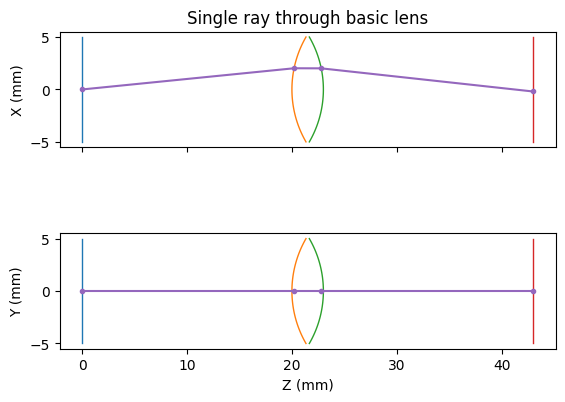

In [2]:
def test1():
    surface_list = [
        {"surf": "dummy", "dist": 20, "draw_radius": 5},
        {
            "surf": "conic",
            "dist": 3,
            "c": 1 / 10,
            "k": 0,
            "n1": 1,
            "n2": 1.5,
            "draw_radius": 5,
        },
        {
            "surf": "conic",
            "dist": 20,
            "c": -1 / 10,
            "k": 0,
            "n1": 1.5,
            "n2": 1,
            "draw_radius": 5,
        },
        {"surf": "dummy", "dist": 10, "draw_radius": 5}
    ]
    geometry = rtt.build_geometry(surface_list)
    field_points = np.array([[0, 0, 0]])
    pupil_points = np.array([[1, 0, 10]])
    ray_table = rtt.ray_table_from_fields_points(geometry, field_points, pupil_points)
    ray_properties = rtt.default_ray_properties(ray_table)
    rtt.propagate_ray(ray_table, ray_properties, geometry)
    axd = rtt.new_plot_xy()
    rtt.plot_faces(axd, geometry)
    rtt.plot_rays(axd, geometry, ray_table, ray_properties, marker = '.')
    axd["axs"][0].set_title("Single ray through basic lens")

test1()

### Singlet lens, finite conjugate

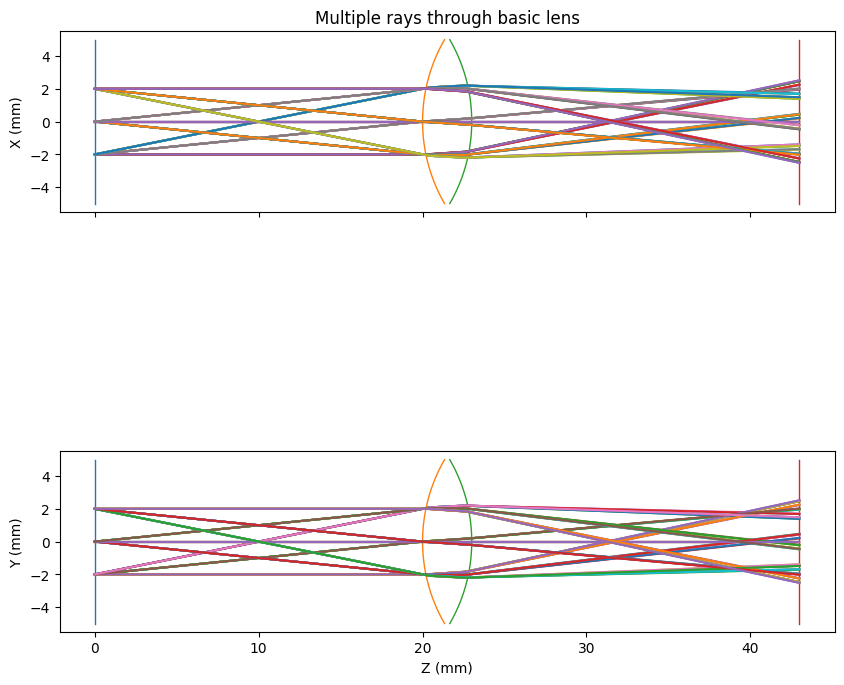

In [3]:
def test2():
    surface_list = [
        {"surf": "dummy", "dist": 20, "draw_radius": 5},
        {
            "surf": "conic",
            "dist": 3,
            "c": 1 / 10,
            "k": 0,
            "n1": 1,
            "n2": 1.5,
            "draw_radius": 5,
        },
        {
            "surf": "conic",
            "dist": 20,
            "c": -1 / 10,
            "k": 0,
            "n1": 1.5,
            "n2": 1,
            "draw_radius": 5,
        },
        {"surf": "dummy", "dist": 0, "draw_radius": 5},
    ]
    geometry = rtt.build_geometry(surface_list)

    lsf = np.linspace(-2, 2, 3)
    lsp = np.linspace(-2, 2, 3)
    fieldPoints = np.array([[x, y, 0] for x in lsf for y in lsf])
    pupilPoints = np.array([[x, y, 20] for x in lsp for y in lsp])
    
    ray_table = rtt.ray_table_from_fields_points(geometry, fieldPoints, pupilPoints)
    
    ray_properties = rtt.default_ray_properties(ray_table)
    rtt.propagate_ray(ray_table, ray_properties, geometry)
    axd = rtt.new_plot_xy(figsize = (10, 10))
    rtt.plot_faces(axd, geometry)
    rtt.plot_rays(axd, geometry, ray_table, ray_properties)
    axd["axs"][0].set_title("Multiple rays through basic lens")

test2()

### Singlet lens, infinite conjugate

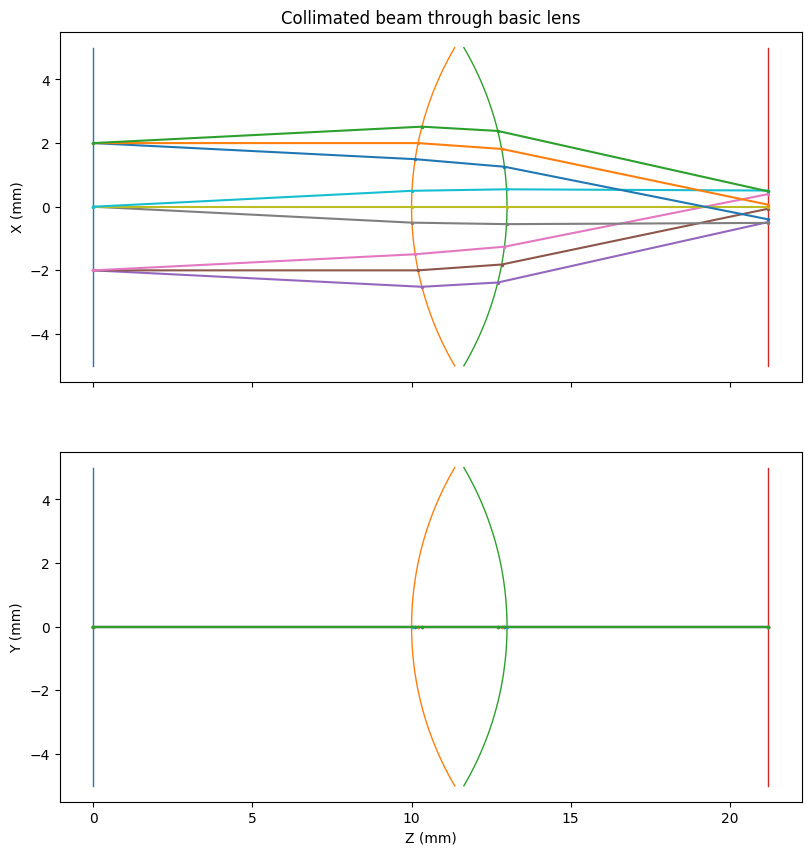

In [4]:
def test3():
    surface_list = [
        {"surf": "dummy", "dist": 10, "draw_radius": 5},
        {
            "surf": "conic",
            "dist": 3.0,
            "c": 1 / 9.9,
            "k": 0,
            "n1": 1,
            "n2": 1.515,
            "draw_radius": 5,
        },
        {
            "surf": "conic",
            "dist": 8.2,
            "c": -1 / 9.9,
            "k": 0,
            "n1": 1.515,
            "n2": 1,
            "draw_radius": 5,
        },
        {"surf": "dummy", "dist": 0, "draw_radius": 5},
    ]
    
    geometry = rtt.build_geometry(surface_list)

    lsf = np.linspace(-2, 2, 3)
    lsp = np.linspace(-0.05, 0.05, 3)
    field_points = np.array([np.array([x, 0, 0]) for x in lsf])
    pupil_points = np.array([rtt.normalize_vec(np.array([x, 0, 1])) for x in lsp])
    ray_table = rtt.ray_table_from_fields_vectors(geometry, field_points, pupil_points)
    ray_properties = rtt.default_ray_properties(ray_table)
    rtt.propagate_ray(ray_table, ray_properties, geometry)
    axd = rtt.new_plot_xy(figsize = (10, 10))
    rtt.plot_faces(axd, geometry)
    rtt.plot_rays(axd, geometry, ray_table, ray_properties, marker = '.', markersize = 3)
    axd["axs"][0].set_title("Collimated beam through basic lens")

test3()

### Spherical mirror

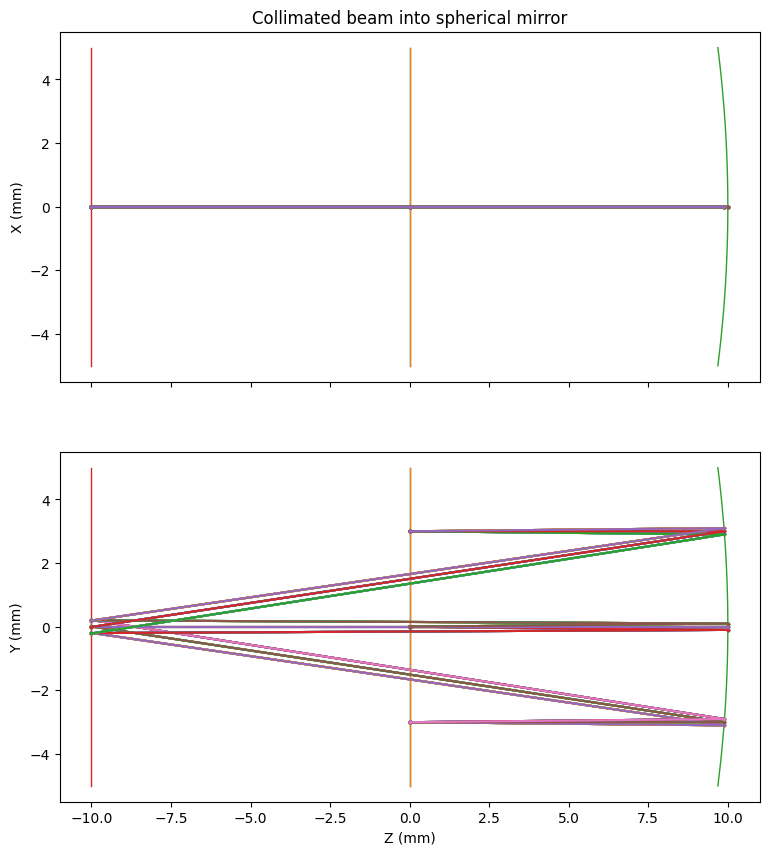

In [5]:
def test4():
    surface_list = [
        {"surf": "dummy", "dist": 0, "draw_radius": 5},
        {"surf": "dummy", "dist": 10, "draw_radius": 5},
        {
            "surf": "conic",
            "dist": -20,
            "c": -1 / 40,
            "k": 0,
            "n1": 1,
            "n2": -1,
            "draw_radius": 5,
        },
        {"surf": "dummy", "dist": 0, "draw_radius": 5},
    ]
    geometry = rtt.build_geometry(surface_list)

    lsf = np.linspace(-3, 3, 3)
    lsp = np.linspace(-0.01, 0.01, 3)
    
    field_points = [np.array([0.0, y, 0.0]) for x in lsf for y in lsf]
    pupil_points = [rtt.normalize_vec(np.array([0.0, y, 1.0])) for x in lsp for y in lsp]

    ray_table = rtt.ray_table_from_fields_vectors(geometry, field_points, pupil_points)
    ray_properties = rtt.default_ray_properties(ray_table)
    rtt.propagate_ray(ray_table, ray_properties, geometry)
    axd = rtt.new_plot_xy(figsize = (10, 10))
    rtt.plot_faces(axd, geometry)
    rtt.plot_rays(axd, geometry, ray_table, ray_properties, marker = '.', markersize = 3)
    axd["axs"][0].set_title("Collimated beam into spherical mirror")

test4()

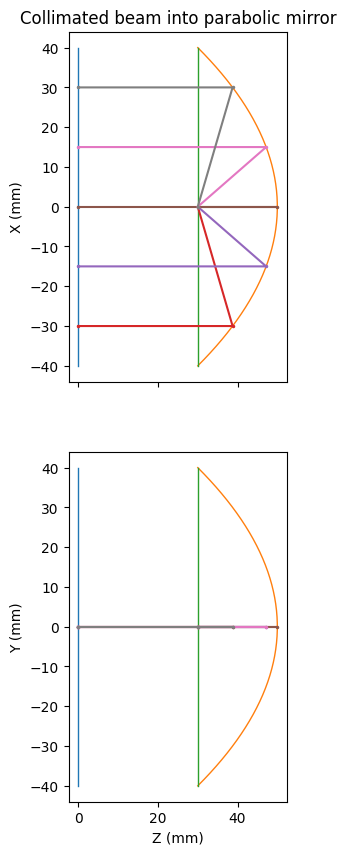

In [6]:
def test5():
    surface_list = [
        {"surf": "dummy", "dist": 50, "draw_radius": 40},
        {
            "surf": "conic",
            "dist": -20,
            "c": -1 / 40,
            "k": -1,
            "n1": 1,
            "n2": -1,
            "draw_radius": 40,
        },
        {"surf": "dummy", "dist": 0, "draw_radius": 40},
    ]
    geometry = rtt.build_geometry(surface_list)

    lsf = np.linspace(-30, 30, 5)

    field_points = [np.array([x, 0, 0]) for x in lsf]
    pupil_points = np.array([[0, 0, 1]])

    ray_table = rtt.ray_table_from_fields_vectors(geometry, field_points, pupil_points)
    ray_properties = rtt.default_ray_properties(ray_table)
    rtt.propagate_ray(ray_table, ray_properties, geometry)
    axd = rtt.new_plot_xy(figsize = (10, 10))
    rtt.plot_faces(axd, geometry)
    rtt.plot_rays(axd, geometry, ray_table, ray_properties, marker = '.', markersize = 3)
    axd["axs"][0].set_title("Collimated beam into parabolic mirror")

test5()

### Diffraction grating

beta_deg 22.321294750233623


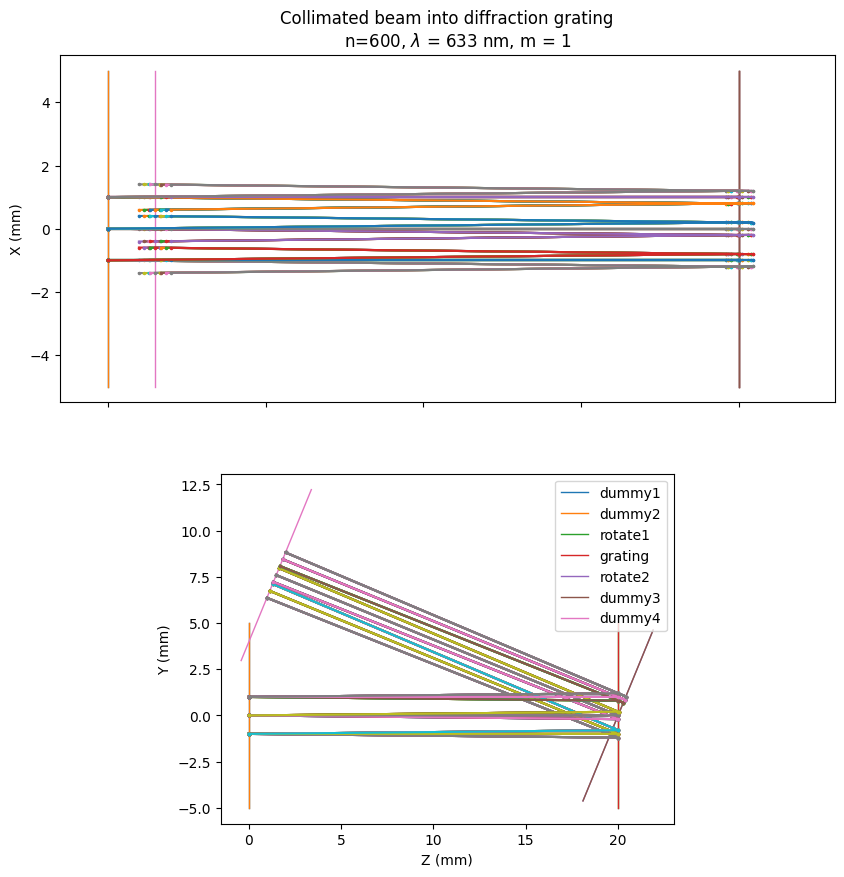

In [57]:
alpha_deg = 0
alpha = alpha_deg*np.pi/180
n = 600 # grooves per mm
lamda = 633e-6 # wavelength in mm
m = 1
# sin(alpha) + sin(beta) = m*n*lamda
beta = np.arcsin(m*n*lamda - np.sin(alpha))
beta_deg = beta*180/np.pi
print('beta_deg', beta_deg)
def test6():

    surface_list = [
        {'label': 'dummy1',
         "surf": "dummy", "dist": 0, "draw_radius": 5},
        {'label': 'dummy2',
         "surf": "dummy", "dist": 20, "draw_radius": 5},
         {
             'label': 'rotate1',
            "surf": "rotate",
            "axis": np.array((1, 0, 0)),
            "degrees": alpha*180/np.pi,
            "dist": 0,
            "draw_radius": 5,
        },
        {
            'label': 'grating',
            "surf": "plane grating",
            "dist": 0,
            "m": 1,
            "d": 1 / n,
            "n1": 1,
            "n2": -1,
            "draw_radius": 5,
        },
        {
            'label': 'rotate2',
            "surf": "rotate",
            "axis": np.array((1, 0, 0)),
            "degrees": beta_deg,
            "dist": 0,
            "draw_radius": 5,
        },
        {'label': 'dummy3', "surf": "dummy", "dist": -20, "draw_radius": 5},
        {'label': 'dummy4', "surf": "dummy", "dist": -20, "draw_radius": 5},
    ]
    geometry = rtt.build_geometry(surface_list)

    lsf = np.linspace(-1, 1, 3)
    lsp = np.linspace(-0.01, 0.01, 3)
    field_points = [[x, y, 0] for x in lsf for y in lsf]
    
    pupil_points = rtt.normalize_vec_array(np.array([[x, y, 1] for x in lsp for y in lsp]))
    ray_table = rtt.ray_table_from_fields_vectors(geometry, field_points, pupil_points)
    ray_properties = rtt.default_ray_properties(ray_table)
    rtt.propagate_ray(ray_table, ray_properties, geometry)
    axd = rtt.new_plot_xy(figsize = (10, 10))
    rtt.plot_faces(axd, geometry)
    rtt.plot_rays(axd, geometry, ray_table, ray_properties, marker = '.', markersize = 3)
    axd["axs"][0].set_title(
        """Collimated beam into diffraction grating
    n=600, $\lambda$ = 633 nm, m = 1"""
    )
    axd["axs"][1].legend()

test6()

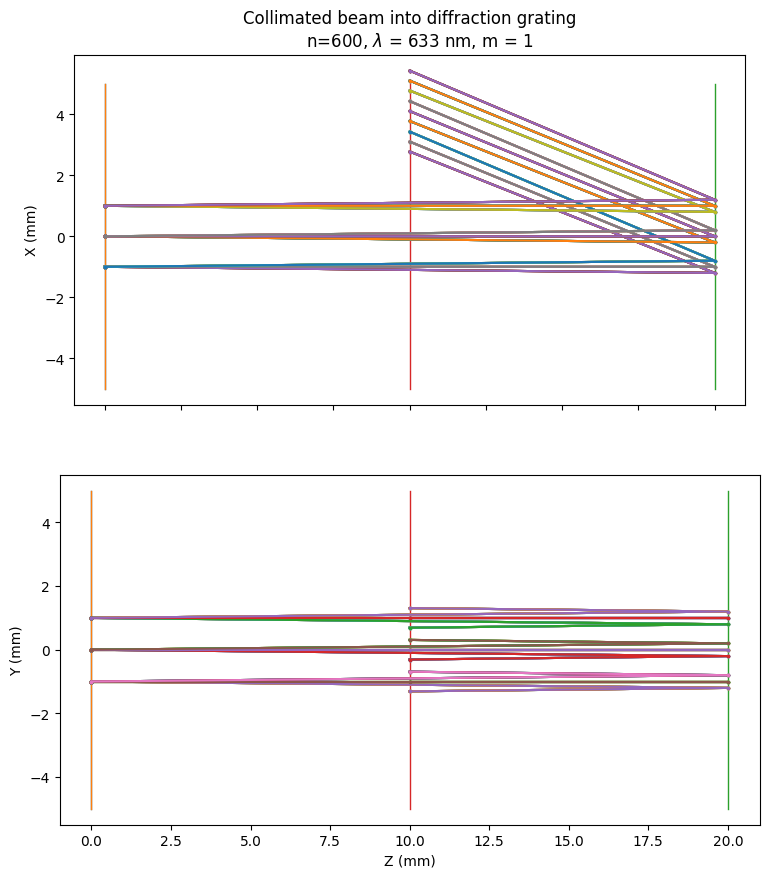

In [17]:
def test6a():

    surface_list = [
        {"surf": "dummy", "dist": 0, "draw_radius": 5},
        {"surf": "dummy", "dist": 20, "draw_radius": 5},
        {
            "surf": "plane grating 2",
            "dist": -10,
            "m": 1,
            "d": 1 / 600,
            "n1": 1,
            "n2": -1,
            "draw_radius": 5,
        },
        {"surf": "dummy", "dist": -20, "draw_radius": 5},
    ]
    geometry = rtt.build_geometry(surface_list)

    lsf = np.linspace(-1, 1, 3)
    lsp = np.linspace(-0.01, 0.01, 3)
    field_points = [[x, y, 0] for x in lsf for y in lsf]
    
    pupil_points = rtt.normalize_vec_array(np.array([[x, y, 1] for x in lsp for y in lsp]))
    ray_table = rtt.ray_table_from_fields_vectors(geometry, field_points, pupil_points)
    ray_properties = rtt.default_ray_properties(ray_table)
    rtt.propagate_ray(ray_table, ray_properties, geometry)
    axd = rtt.new_plot_xy(figsize = (10, 10))
    rtt.plot_faces(axd, geometry)
    rtt.plot_rays(axd, geometry, ray_table, ray_properties, marker = '.', markersize = 3)
    axd["axs"][0].set_title(
        """Collimated beam into diffraction grating
    n=600, $\lambda$ = 633 nm, m = 1"""
    )


test6a()

### Coordinate breaks
The coordinate break tests are just quick visual checks that the programs are working.

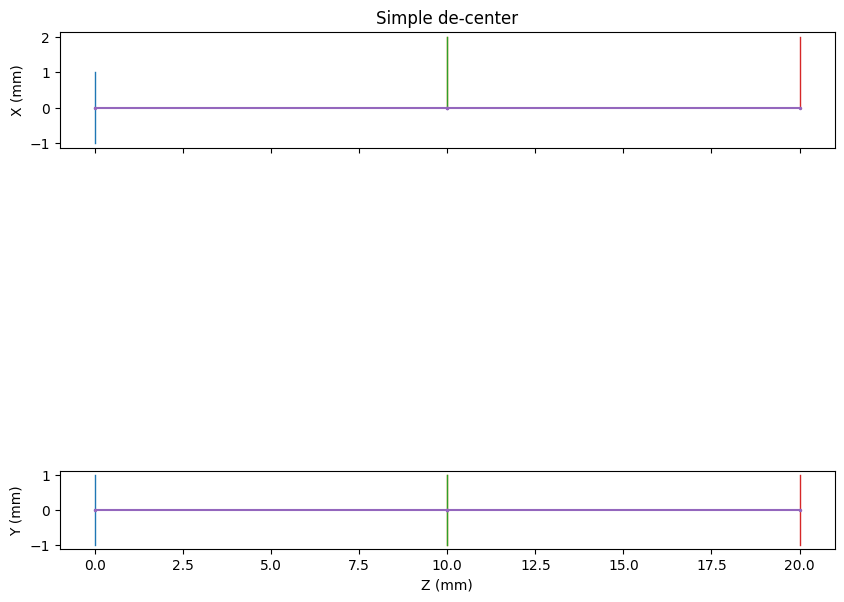

In [8]:
def test6():
    surface_list = [
        {"surf": "dummy", "dist": 10, "draw_radius": 1},
        {"surf": "shift", "delta": np.array((1, 0, 0)), "dist": 0, "draw_radius": 1},
        {"surf": "dummy", "dist": 10, "draw_radius": 1},
        {"surf": "dummy", "dist": 10, "draw_radius": 1},
    ]

    geometry = rtt.build_geometry(surface_list)
    field_points = [np.array([0, 0, 0])]
    pupil_points = [np.array([0, 0, 1])]
    ray_table = rtt.ray_table_from_fields_vectors(geometry, field_points, pupil_points)
    ray_properties = rtt.default_ray_properties(ray_table)
    rtt.propagate_ray(ray_table, ray_properties, geometry)
    axd = rtt.new_plot_xy(figsize = (10, 10))
    rtt.plot_faces(axd, geometry)
    rtt.plot_rays(axd, geometry, ray_table, ray_properties, marker = '.', markersize = 3)
    axd["axs"][0].set_title("Simple de-center")

test6()

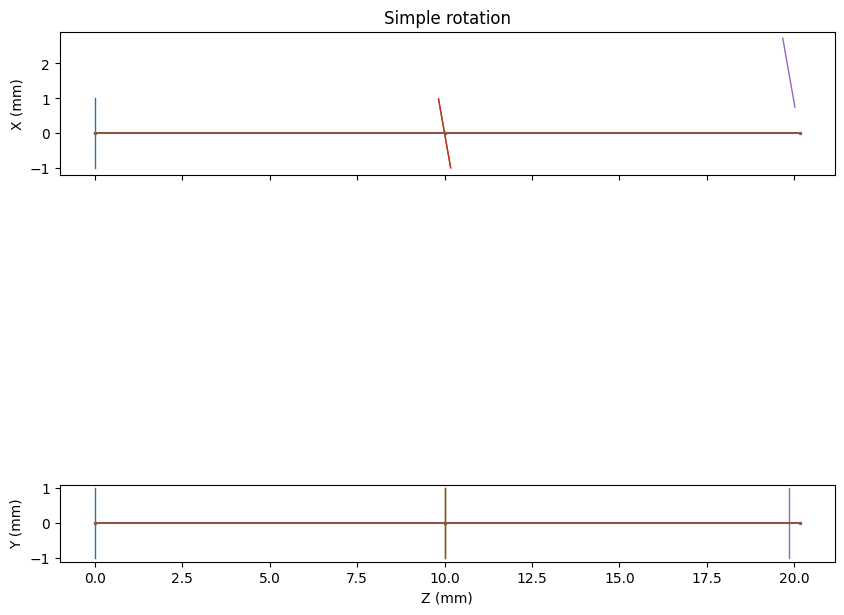

In [9]:
def test6():
    surface_list = [
        {"surf": "dummy", "dist": 10, "draw_radius": 1},
        {"surf": "dummy", "dist": 0, "draw_radius": 0},
        {
            "surf": "rotate",
            "axis": np.array((0, 1, 0)),
            "degrees": 10,
            "dist": 0,
            "draw_radius": 1,
        },
        {"surf": "dummy", "dist": 10, "draw_radius": 1},
        {"surf": "dummy", "dist": 0, "draw_radius": 1},
    ]

    geometry = rtt.build_geometry(surface_list)

    lsf = np.linspace(-1, 1, 3)
    field_points = [np.array([0, 0, 0])]
    pupil_points = [np.array([0, 0, 1])]
    ray_table = rtt.ray_table_from_fields_vectors(geometry, field_points, pupil_points)
    ray_properties = rtt.default_ray_properties(ray_table)
    rtt.propagate_ray(ray_table, ray_properties, geometry)
    axd = rtt.new_plot_xy(figsize = (10, 10))
    rtt.plot_faces(axd, geometry)
    rtt.plot_rays(axd, geometry, ray_table, ray_properties, marker = '.', markersize = 3)
    axd["axs"][0].set_title("Simple rotation")

test6()

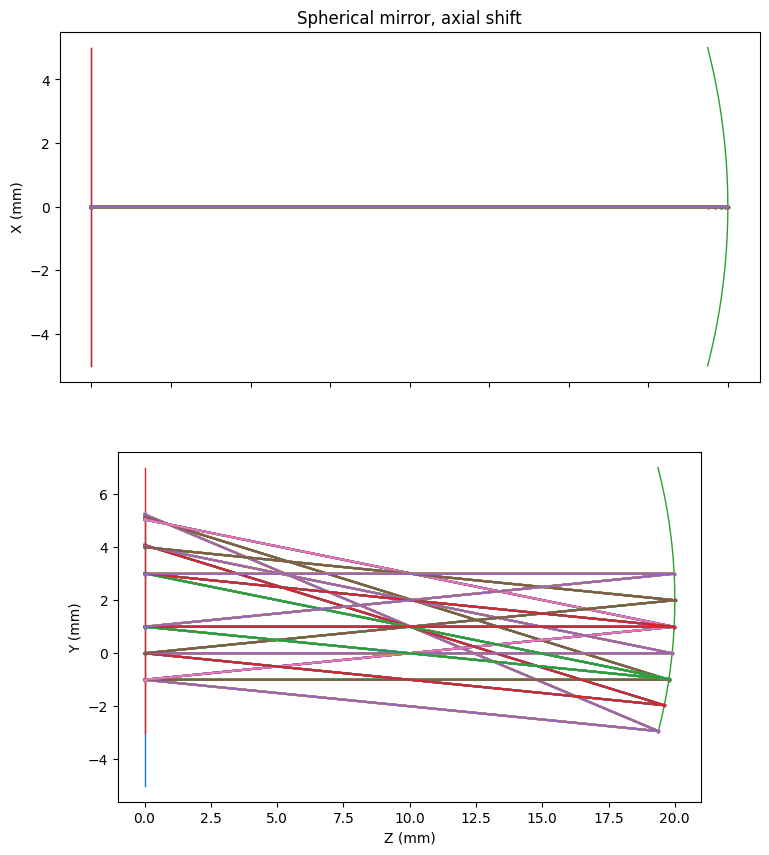

In [10]:
def test6():
    surface_list = [
        {"surf": "dummy", "dist": 20, "draw_radius": 5},
        {"surf": "shift", "delta": np.array([0, 2, 0]), "dist": 0, "draw_radius": 0},
        {
            "surf": "conic",
            "dist": -20,
            "c": -1 / 20,
            "k": 0,
            "n1": 1,
            "n2": -1,
            "draw_radius": 5,
        },
        {"surf": "dummy", "dist": 0, "draw_radius": 5},
    ]
    geometry = rtt.build_geometry(surface_list)

    lsf = np.linspace(-1, 1, 3)
    lsp = np.linspace(-0.1, 0.1, 3)

    field_points = [np.array([0.0, y, 0.0]) for x in lsf for y in lsf]
    pupil_points = [rtt.normalize_vec(np.array([0.0, y, 1.0])) for x in lsp for y in lsp]

    ray_table = rtt.ray_table_from_fields_vectors(geometry, field_points, pupil_points)
    ray_properties = rtt.default_ray_properties(ray_table)
    rtt.propagate_ray(ray_table, ray_properties, geometry)
    axd = rtt.new_plot_xy(figsize = (10, 10))
    rtt.plot_faces(axd, geometry)
    rtt.plot_rays(axd, geometry, ray_table, ray_properties, marker = '.', markersize = 3)
    axd["axs"][0].set_title("Spherical mirror, axial shift")
    
test6()

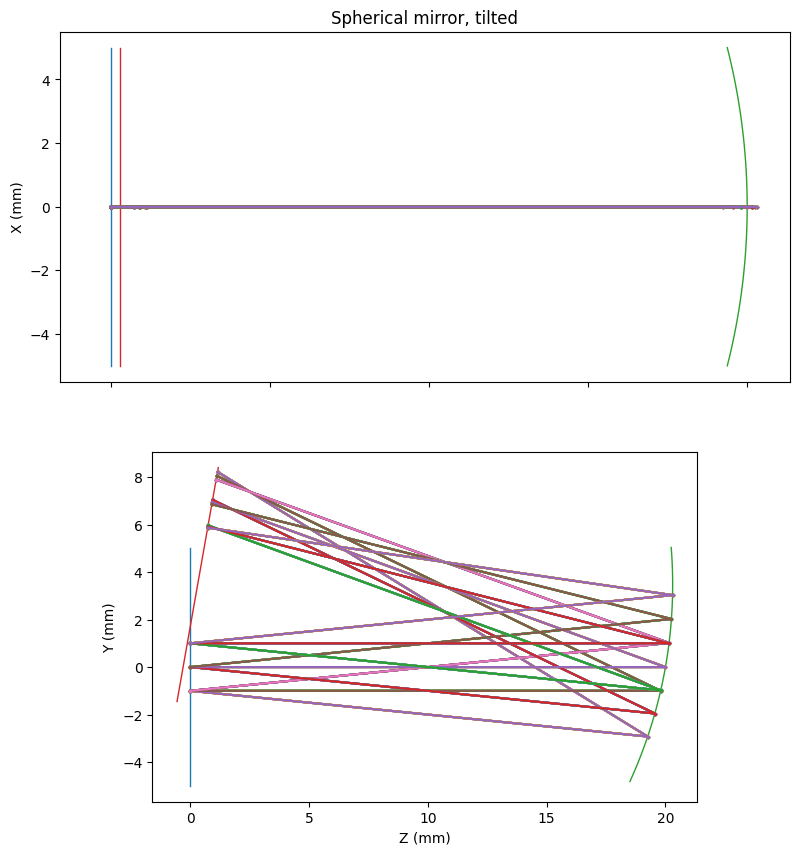

In [11]:
def test7():
    surface_list = [
        {"surf": "dummy", "dist": 20, "draw_radius": 5},
        {
            "surf": "rotate",
            "axis": np.array([1, 0, 0]),
            "degrees": 10,
            "dist": 0,
            "draw_radius": 0,
        },
        {
            "surf": "conic",
            "dist": -20,
            "c": -1 / 20,
            "k": 0,
            "n1": 1,
            "n2": -1,
            "draw_radius": 5,
        },
        {"surf": "dummy", "dist": 0, "draw_radius": 5},
    ]

    geometry = rtt.build_geometry(surface_list)

    lsf = np.linspace(-1, 1, 3)
    lsp = np.linspace(-0.1, 0.1, 3)
    
    field_points = [np.array([0.0, y, 0.0]) for x in lsf for y in lsf]
    pupil_points = [rtt.normalize_vec(np.array([0.0, y, 1.0])) for x in lsp for y in lsp]

    ray_table = rtt.ray_table_from_fields_vectors(geometry, field_points, pupil_points)
    ray_properties = rtt.default_ray_properties(ray_table)
    rtt.propagate_ray(ray_table, ray_properties, geometry)
    axd = rtt.new_plot_xy(figsize = (10, 10))
    rtt.plot_faces(axd, geometry)
    rtt.plot_rays(axd, geometry, ray_table, ray_properties, marker = '.', markersize = 3)
    axd["axs"][0].set_title("Spherical mirror, tilted")

test7()

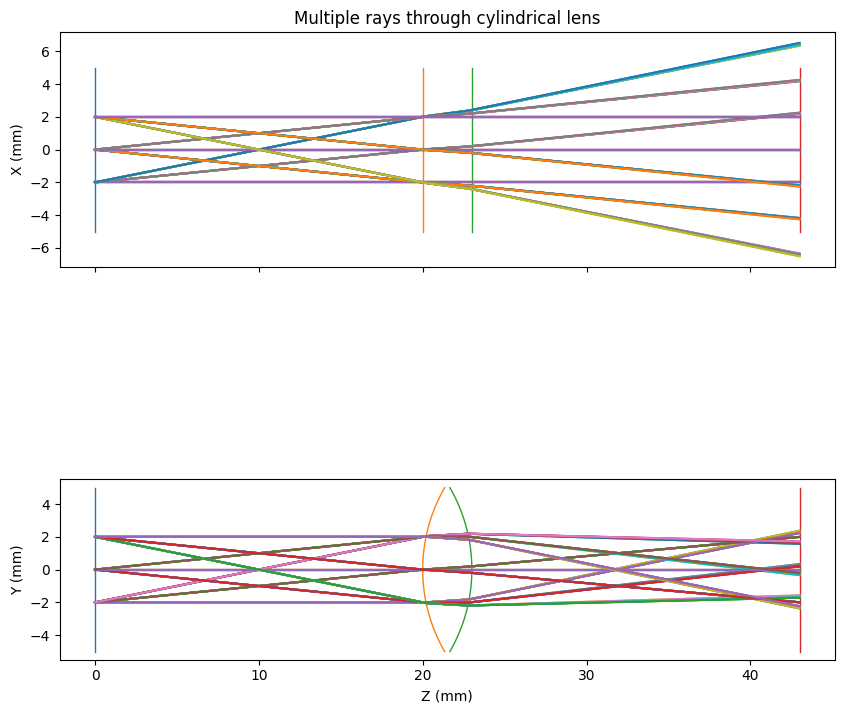

In [12]:
def test8():
    surface_list = [
        {"surf": "dummy", "dist": 20, "draw_radius": 5},
        {
            "surf": "cylindrical",
            "dist": 3,
            "c": 1 / 10,
            "k": 0,
            "n1": 1,
            "n2": 1.5,
            "draw_radius": 5,
        },
        {
            "surf": "cylindrical",
            "dist": 20,
            "c": -1 / 10,
            "k": 0,
            "n1": 1.5,
            "n2": 1,
            "draw_radius": 5,
        },
        {"surf": "dummy", "dist": 0, "draw_radius": 5},
    ]
    geometry = rtt.build_geometry(surface_list)

    lsf = np.linspace(-2, 2, 3)
    lsp = np.linspace(-2, 2, 3)
    fieldPoints = np.array([[x, y, 0] for x in lsf for y in lsf])
    pupilPoints = np.array([[x, y, 20] for x in lsp for y in lsp])
    
    ray_table = rtt.ray_table_from_fields_points(geometry, fieldPoints, pupilPoints)
    
    ray_properties = rtt.default_ray_properties(ray_table)
    rtt.propagate_ray(ray_table, ray_properties, geometry)
    axd = rtt.new_plot_xy(figsize = (10, 10))
    rtt.plot_faces(axd, geometry)
    rtt.plot_rays(axd, geometry, ray_table, ray_properties)
    axd["axs"][0].set_title("Multiple rays through cylindrical lens")
    #axd["fig"].tight_layout()

test8()